2023/03/26

# ただのQ学習

たぶん世界最小の問題設定
- 状態 $s \in \{0, 1\}$
- 行動 $a \in \{0, 1\}$
- (s, a, s', r) の組み合わせ定義
  - (0, 0, 0, 1)
  - (0, 1, 1, 0)
  - (1, 0, 1, 2)
  - (1, 1, 0, 0)
  - ★遷移確率は考えない (s' は (s, a) により一意に定まる)
  - ★a = 0 なら待機，a = 1 なら移動
- 3回行動し，総報酬を競う
  - ★(s, a) = (0, 0) で待機すれば報酬がもらえるが，3手以上プレイする場合，(0, 0) の即時報酬を無視して s=1 に移動してから待機したほうが良い

In [1]:
# たぶん世界最小のQ学習コード
import numpy as np

Q = np.zeros((2, 2))            # Qテーブル Q[s, a]．0で初期化
r = np.array([[1, 0], [2, 0]])  # 即時報酬 r[s, a]

for episode in range(1000):
    s = 0
    for t in range(3):
        # 行動，状態更新（一時変数），Q値更新
        a = np.random.randint(2) if np.random.random() < 0.2 else Q[s].argmax()
        snew = int(s != a)
        Q[s, a] += 0.1 * (r[s, a] + 0.8 * max(Q[snew]) - Q[s, a])
        s = snew
    print(Q.flatten().round(2)) # Qテーブルの状態

[0.2 0.  0.  0. ]
[0.39 0.   0.   0.  ]
[0.66 0.   0.   0.  ]
[0.91 0.   0.   0.  ]
[1.15 0.   0.   0.  ]
[1.38 0.   0.   0.  ]
[1.38 0.   0.4  0.  ]
[1.59 0.   0.4  0.  ]
[1.79 0.   0.4  0.  ]
[1.98 0.   0.4  0.  ]
[2.16 0.   0.4  0.  ]
[2.27 0.03 0.4  0.  ]
[2.43 0.03 0.4  0.  ]
[2.58 0.03 0.4  0.  ]
[2.73 0.03 0.4  0.  ]
[2.86 0.03 0.4  0.  ]
[2.99 0.03 0.4  0.  ]
[3.1  0.03 0.4  0.  ]
[3.18 0.06 0.4  0.  ]
[3.29 0.06 0.4  0.  ]
[3.39 0.06 0.4  0.  ]
[3.48 0.06 0.4  0.  ]
[3.51 0.09 0.59 0.  ]
[3.51 0.12 0.96 0.  ]
[3.6  0.12 0.96 0.  ]
[3.68 0.12 0.96 0.  ]
[3.76 0.12 0.96 0.  ]
[3.83 0.12 0.96 0.  ]
[3.9  0.12 0.96 0.  ]
[3.97 0.12 0.96 0.  ]
[3.99 0.19 1.14 0.  ]
[4.05 0.19 1.14 0.  ]
[4.1  0.19 1.14 0.  ]
[4.15 0.19 1.14 0.  ]
[4.2  0.19 1.14 0.  ]
[4.25 0.19 1.14 0.  ]
[4.3  0.19 1.14 0.  ]
[4.31 0.26 1.32 0.  ]
[4.35 0.26 1.32 0.  ]
[4.39 0.26 1.32 0.  ]
[4.41 0.34 1.32 0.  ]
[4.45 0.34 1.32 0.  ]
[4.48 0.34 1.32 0.  ]
[4.51 0.34 1.32 0.  ]
[4.54 0.34 1.32 0.  ]
[4.57 0.34 1.3

In [2]:
# 環境とエージェントをオブジェクト化
import numpy as np

class Env:
    def __init__(self):
        self.t = 0
        self.s = 0
        self.r = np.array([[1, 0], [2, 0]])
        self.R = 0

    def done(self):
        return self.t == 3

    def step(self, a):
        r = self.r[s, a]
        self.R += r
        self.s = (s + a) % 2
        self.t += 1
        return self.r[s, a]

class Agent:
    def __init__(self):
        self.Q = np.zeros((2, 2))

    def act(self, s, ε=0):
        if np.random.random() < ε:
            return round(np.random.random())
        return self.Q[s].argmax()

    def learn(self, s, a, snew, r, lr=0.1, gamma=0.8):
        self.Q[s, a] += lr * (r + gamma * max(self.Q[snew]) - self.Q[s, a])

agent = Agent()
Qhistory = []   # Q値と総報酬Rの記録
for episode in range(1000):
    env = Env()
    for t in range(4):
        s = env.s
        a = agent.act(s, ε=0.2)
        r = env.step(a)
        agent.learn(s, a, env.s, r)
        print(f"({s}, {a})", end="\t")
        if env.done():
            break
    print(agent.Q.flatten().round(2), env.R)
    Qhistory.append(np.r_[agent.Q.flatten(), env.R])
Qhistory = np.array(Qhistory)

(0, 0)	(0, 0)	(0, 0)	[0.29 0.   0.   0.  ] 3
(0, 0)	(0, 0)	(0, 0)	[0.57 0.   0.   0.  ] 3
(0, 0)	(0, 1)	(1, 0)	[0.66 0.   0.2  0.  ] 3
(0, 0)	(0, 0)	(0, 0)	[0.91 0.   0.2  0.  ] 3
(0, 0)	(0, 0)	(0, 0)	[1.15 0.   0.2  0.  ] 3
(0, 0)	(0, 1)	(1, 1)	[1.23 0.02 0.2  0.1 ] 1
(0, 0)	(0, 0)	(0, 0)	[1.45 0.02 0.2  0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[1.66 0.02 0.2  0.1 ] 3
(0, 1)	(1, 0)	(1, 0)	[1.66 0.03 0.59 0.1 ] 4
(0, 0)	(0, 1)	(1, 0)	[1.73 0.07 0.78 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[1.92 0.07 0.78 0.1 ] 3
(0, 0)	(0, 1)	(1, 0)	[1.98 0.13 0.96 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[2.16 0.13 0.96 0.1 ] 3
(0, 0)	(0, 1)	(1, 0)	[2.22 0.19 1.14 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[2.38 0.19 1.14 0.1 ] 3
(0, 0)	(0, 1)	(1, 0)	[2.43 0.27 1.32 0.1 ] 3
(0, 1)	(1, 0)	(1, 0)	[2.43 0.34 1.66 0.1 ] 4
(0, 0)	(0, 1)	(1, 0)	[2.48 0.44 1.83 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[2.63 0.44 1.83 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[2.77 0.44 1.83 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[2.9  0.44 1.83 0.1 ] 3
(0, 0)	(0, 0)	(0, 0)	[3.03 0.44 1.83 0.1 ] 3
(0, 0)	(0,

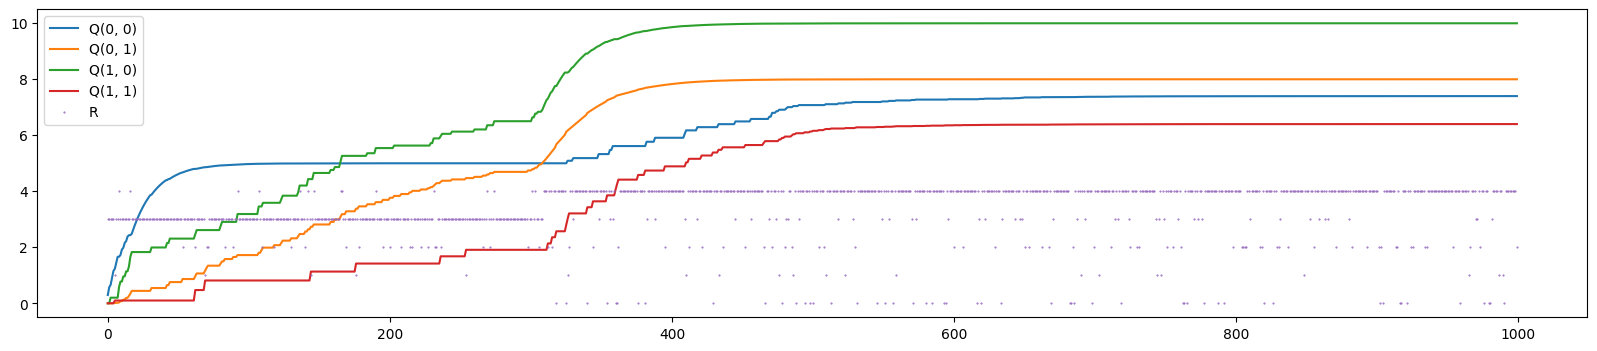

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.plot(Qhistory[:, :4], label=[f"Q({s}, {a})" for s in (0, 1) for a in (0, 1)])
plt.plot(Qhistory[:, -1], ".", markersize=1, label="R")
plt.legend()

- 最初は簡単に即時報酬がもらえる (0, 0) のQ値が高いが，300世代あたりで移動 (0, 1) してから待機 (1, 0) したほうがより総報酬が良いことに気づき，学習が加速．
- 600世代くらいで収束（※学習曲線は実行ごとにかなり変わる）
- 青と橙が逆転する少し前に学習が停滞しているのは偶然？